In [1]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from scipy import io
import os
import glob

In [2]:
from IPython.display import HTML

In [3]:
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

In [4]:
sns.set_style('white')
sns.set_style('ticks')
sns.set_palette('muted')
sns.set_color_codes('muted')

In [5]:
## Laptop
#filepath = '/Users/frankkanayet/Dropbox/NLineExperiment/PilotData'
#filepath = '/Users/frankkanayet/Dropbox/NLineExperiment/PilotData/test3s'
#filepath = '/Users/frankkanayet/Google Drive/NLineData/Beh_Data'

## Desktop
#filepath = '/Users/frankanayet/Dropbox/NLineExperiment/Data'
filepath = '/Users/frankanayet/Google Drive/NLineData/Beh_Data/NLine-Space/NLine'
os.chdir(filepath)

In [6]:
print 'Pandas version ' + pd.__version__

Pandas version 0.17.0


In [7]:
filenames = glob.glob('Nline_*.mat')
print filenames
#index to isolate subj numbers
data_dict = {}
for i in filenames:
    id1 = filenames[0].find('_') + 1
    id2 = filenames[0].find('-')
    sub_nbr = i[id1:id2]
    sub_name = i
    s_id = 's_'+sub_nbr
    data_dict[s_id] = io.loadmat(sub_name)

#sub_name = filenames[0] #This will be changed to a loop for all subjects later
#mat = io.loadmat(sub_name)
data_dict.keys()

['Nline_03001-Oct1315a.mat', 'Nline_03003-Nov0215a.mat', 'Nline_03004-Oct2915corr.mat', 'Nline_03005-Nov0915a.mat', 'Nline_03006-Nov1215a.mat', 'Nline_03007-Nov2315a.mat']


['s_03001', 's_03003', 's_03004', 's_03005', 's_03006', 's_03007']

In [8]:
sub_ex = data_dict.keys()[0]

In [9]:
#data_dict['s_00011']['p']

In [10]:
#for i in data_dict:
#    data_dict[i].pop('__header__')
#    data_dict[i].pop('__version__')
#    data_dict[i].pop('__globals__')
#data_dict['s_00011'].keys()

In [11]:
## The indexes of zeros are as follows [0][0][x][y][z][0] The x y z are the 3 dimensions of the data 3d matrix the zeros are padding
data_dict[sub_ex]['p']['NlineResults'][0][0][0][5][0][0]
len(data_dict[sub_ex]['p']['NlineResults'][0][0][:])

33

In [12]:
data_dict[sub_ex]['p'].dtype.names

('ramp_up',
 'Mean_ITI',
 'Mean_hold',
 'decision',
 'consider',
 'runs',
 'nStim',
 'ntasks',
 'tasks',
 'trialSecs',
 'vDistCM',
 'screenWidthCM',
 'usedScreenSizeDeg',
 'lineLengthDeg',
 'NlineResults',
 'time_Runs',
 'task_transition',
 'ppc_adjust',
 'lineLength',
 'start_Nline',
 'finish_Nline')

In [13]:
cons_time = data_dict[sub_ex]['p']['consider'][0][0][0][0]
dec_time = data_dict[sub_ex]['p']['decision'][0][0][0][0]

In [14]:
new_dat = {}
#new_df = {}
for s in data_dict:
    tasks = ['NlineResults']
    new_dat[s]={}
    #new_df[s] = {}
    for task in tasks:
        dat = data_dict[s]['p'][task]
        num_fields = len(data_dict[s]['p'][task][0][0][0])
        dat_names = []
        for k in range(0,num_fields):
            dat_names.append(dat[0][0][0][k][0][0])
        new_dat[s][task] = {}
        runs = data_dict[s]['p']['runs'][0][0][0][0]
        for run in range(0,runs):
            run_name = 'run'+str(run+1)
            new_dat[s][task][run_name] = {}
            for i in range(0,len(dat_names)):
                new_dat[s][task][run_name][dat_names[i]] = []
                for j in range(0,len(dat[0][0][:])-1):
                    if dat_names[i] == 'catch_probe':
                        new_dat[s][task][run_name][dat_names[i]].append(dat[0][0][j+1][i][run])
                    elif dat_names[i] == 'Probe':
                        new_dat[s][task][run_name][dat_names[i]].append(dat[0][0][j+1][i][run][0])
                    else:
                        new_dat[s][task][run_name][dat_names[i]].append(dat[0][0][j+1][i][run][0])
#legible access to the data
Nline = 'NlineResults' #numberline

In [15]:
data_dict[s]['p'][task][0][0][1][i][run][0]

array([ 22.50054871])

In [16]:
new_dat[sub_ex]['NlineResults']['run1'].keys()

[u'Slow',
 u'Line_pct',
 u'iti',
 u'cursor_pos',
 u'ITI_onset_real',
 u'ITI_onset',
 u'RT',
 u'decision_end',
 u'decision_onset_real',
 u'decision_end_real',
 u'Correct',
 u'Wrong',
 u'BadPress',
 u'Press',
 u'Response',
 u'Acc',
 u'Task',
 u'Trial',
 u'Points',
 u'Error',
 u'catch',
 u'hold',
 u'Block',
 u'Probe',
 u'consider_onset_real',
 u'consider_onset',
 u'decision_onset',
 u'hold_onset_real',
 u'hold_onset']

In [17]:
new_dat[sub_ex]['NlineResults']['run1']['Error']

[array([0], dtype=uint8),
 array([0], dtype=uint8),
 array([0], dtype=uint8),
 array([0], dtype=uint8),
 array([0], dtype=uint8),
 array([0], dtype=uint8),
 array([1], dtype=uint8),
 array([0], dtype=uint8),
 array([0], dtype=uint8),
 array([0], dtype=uint8),
 array([0], dtype=uint8),
 array([0], dtype=uint8),
 array([0], dtype=uint8),
 array([1], dtype=uint8),
 array([0], dtype=uint8),
 array([0], dtype=uint8),
 array([0], dtype=uint8),
 array([0], dtype=uint8),
 array([1], dtype=uint8),
 array([0], dtype=uint8),
 array([0], dtype=uint8),
 array([0], dtype=uint8),
 array([0], dtype=uint8),
 array([0], dtype=uint8),
 array([0], dtype=uint8),
 array([0], dtype=uint8),
 array([0], dtype=uint8),
 array([0], dtype=uint8),
 array([0], dtype=uint8),
 array([1], dtype=uint8),
 array([0], dtype=uint8),
 array([0], dtype=uint8)]

In [18]:
subj = data_dict.keys()
tasks = [Nline]
tuples = []
rows = len(data_dict[sub_ex]['p'][Nline][0][0][:])-1
for s in subj:
    runs = new_dat[s]['NlineResults'].keys()
    for run in runs:
        for i in range(0,rows):
            tuples.append((s, run, i))
len(tuples)
#iterables = [subj,tasks,runs]
indexes = pd.MultiIndex.from_tuples(tuples, names=['Subj', 'Run', 'Trial'])
nline_cols = len(new_dat[sub_ex][Nline]['run1'].keys())

In [19]:
indexes[90]

('s_03001', 'run2', 26)

In [20]:
indexes[1][1]

'run1'

In [21]:
varnames = new_dat[sub_ex][Nline]['run1'].keys()
varnames[24]

u'consider_onset_real'

In [22]:
len(indexes)

768

In [23]:
# Code empty cells of probes and catch_probes as Nan
Dic_list = []
probes = ['catch_probe']
for data in indexes:
    temp_dict = {}
    for var in varnames:
        if len(new_dat.get(data[0]).get(Nline).get(data[1]).get(var)[data[2]]) == 0:
            new_dat.get(data[0]).get(Nline).get(data[1]).get(var)[data[2]] = np.array([np.nan])
        temp_dict[var] = new_dat.get(data[0]).get(Nline).get(data[1]).get(var)[data[2]][0]
    Dic_list.append(temp_dict)

In [24]:
#Create dataframe
nline_df = pd.DataFrame(Dic_list, index=indexes)
sum(nline_df.loc[sub_ex].loc['run1'].iloc[0:48]['catch'])

8.0

In [25]:
nline_df.loc[sub_ex].loc['run4'].iloc[0:10]['Line_pct']

Trial
0    0.74
1    0.60
2    0.33
3    0.93
4    0.07
5    0.85
6    0.45
7    0.28
8    0.65
9    0.09
Name: Line_pct, dtype: float64

In [26]:
nline_df.index.names = ['Subject', 'Run', 'Trial']
nline_df.index.names

FrozenList([u'Subject', u'Run', u'Trial'])

In [27]:
#test = nline_df['Probe']
#for i in range(0,len(test)):
#    test[i] = np.ravel(test[i])
#    test[i] = test[i][0]
#nline_df['Probe'] = test
#nline_df['Probe']

### Create Stim Labels

In [28]:
#now nline
#nline_df['Num'] = nline_df['Num'].map('{:.0f}'.format)
#nline_df['Denom'] = nline_df['Denom'].map('{:.0f}'.format)
#nline_df['Stim'] = nline_df['Num']+'/'+nline_df['Denom']
#nline_df['Stim']

In [29]:
nline_df.columns

Index([u'Acc', u'BadPress', u'Block', u'Correct', u'Error', u'ITI_onset',
       u'ITI_onset_real', u'Line_pct', u'Points', u'Press', u'Probe', u'RT',
       u'Response', u'Slow', u'Task', u'Trial', u'Wrong', u'catch',
       u'consider_onset', u'consider_onset_real', u'cursor_pos',
       u'decision_end', u'decision_end_real', u'decision_onset',
       u'decision_onset_real', u'hold', u'hold_onset', u'hold_onset_real',
       u'iti'],
      dtype='object')

In [30]:
#Make task as string
nline_df['Task'] = nline_df['Task'].astype(str)
nline_df['Task'][nline_df['Task']=='1.0'] = 'Pos'
nline_df['Task'][nline_df['Task']=='2.0'] = 'Neg'
nline_df['Task'][nline_df['Task']=='3.0'] = 'Word'
nline_df['Task'].iloc[16]

/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


'Pos'

In [31]:
nline_df['Task']

Subject  Run   Trial
s_03001  run1  0        Pos
               1        Pos
               2        Pos
               3        Pos
               4        Pos
               5        Pos
               6        Pos
               7        Pos
               8        Pos
               9        Pos
               10       Pos
               11       Pos
               12       Pos
               13       Pos
               14       Pos
               15       Pos
               16       Pos
               17       Pos
               18       Pos
               19       Pos
               20       Pos
               21       Pos
               22       Pos
               23       Pos
               24       Pos
               25       Pos
               26       Pos
               27       Pos
               28       Pos
               29       Pos
                       ... 
s_03007  run4  2        Pos
               3        Pos
               4        Pos
               5        Pos

In [32]:
nline_df['Dist0'] = abs(nline_df['Line_pct'] - 0)
nline_df['Dist100'] = abs(nline_df['Line_pct'] - 1)
nline_df['Dist50'] = abs(nline_df['Line_pct'] - 0.5)
nline_df['LandmarkDist'] = nline_df[['Dist0','Dist100','Dist50']].min(axis=1) 
nline_df['LandmarkDist']

Subject  Run   Trial
s_03001  run1  0        0.14
               1        0.07
               2        0.15
               3        0.05
               4        0.07
               5        0.17
               6        0.24
               7        0.23
               8        0.09
               9        0.09
               10       0.07
               11       0.15
               12       0.10
               13       0.11
               14       0.22
               15       0.21
               16       0.24
               17       0.10
               18       0.07
               19       0.09
               20       0.07
               21       0.23
               22       0.15
               23       0.15
               24       0.07
               25       0.14
               26       0.09
               27       0.11
               28       0.21
               29       0.17
                        ... 
s_03007  run4  2        0.07
               3        0.09
               4      

## Number Line Analyses

### Accuracy & RT

In [33]:
nline_no_miss = nline_df[['Error', 'RT', 'catch']]
nline_no_miss = nline_no_miss[nline_no_miss['catch']<1]
len(nline_no_miss)

528

In [34]:
#nline_no_miss = nline_no_miss.replace(-1, np.nan)
nline_no_miss = nline_no_miss.drop('catch', 1)

In [35]:
nline_no_miss['Missed'] = 0
nline_no_miss['Missed'][(nline_no_miss.RT == -1) & (nline_no_miss.Error == 1)] = 1
nline_no_miss[nline_no_miss.Missed==1]

/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from IPython.kernel.zmq import kernelapp as app


Error  RT  Missed
Subject Run  Trial                   
s_03001 run4 13         1  -1       1
s_03003 run3 15         1  -1       1
s_03004 run1 12         1  -1       1
             21         1  -1       1
             30         1  -1       1
        run3 12         1  -1       1
        run2 0          1  -1       1
             4          1  -1       1
s_03005 run3 7          1  -1       1
        run2 28         1  -1       1
        run4 5          1  -1       1
s_03006 run4 5          1  -1       1

In [36]:
nline_missed = nline_no_miss['Missed']
nline_missed

Subject  Run   Trial
s_03001  run1  0        0
               2        0
               3        0
               4        0
               5        0
               6        0
               7        0
               8        0
               10       0
               12       0
               13       0
               14       0
               16       0
               17       0
               18       0
               19       0
               21       0
               22       0
               24       0
               25       0
               27       0
               29       0
               30       0
               31       0
         run3  0        0
               1        0
               3        0
               4        0
               5        0
               6        0
                       ..
s_03007  run2  24       0
               26       0
               27       0
               28       0
               29       0
               30       0
         run4  1 

## How many trials missed?

In [37]:
nline_missed.groupby(level=0).sum()

Subject
s_03001    1
s_03003    1
s_03004    6
s_03005    3
s_03006    1
s_03007    0
Name: Missed, dtype: int64

In [38]:
missed = nline_missed.groupby(level=0).sum()

## Subject Averages

In [39]:
nline_no_miss = nline_no_miss[nline_no_miss['Missed'] == 0]
nline_no_miss.groupby(level=0).mean()

,Error,RT,Missed
Subject,,,
s_03001,0.189474,0.586479,0
s_03003,0.042254,0.621277,0
s_03004,0.242424,1.027103,0
s_03005,0.096774,0.805840,0
s_03006,0.400000,0.781599,0
s_03007,0.343750,0.710819,0


## Overall Averages

In [40]:
np.mean(nline_no_miss.groupby(level=0).mean())

Error     0.219113
RT        0.755519
Missed    0.000000
dtype: float64

##How many trials did they actually respond?

In [41]:
nline_no_miss_subj = nline_no_miss.groupby(level=0)
nline_no_miss_subj['RT'].count()

Subject
s_03001    95
s_03003    71
s_03004    66
s_03005    93
s_03006    95
s_03007    96
Name: RT, dtype: int64

## RT Histograms

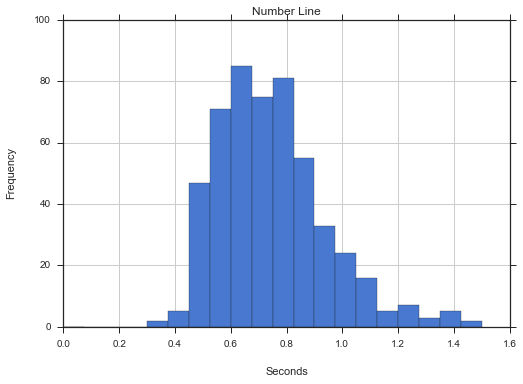

In [42]:
nline_no_miss['RT'].hist(bins=20, range=[0,1.5])
plt.ylim([0,100])
plt.title('Number Line')
plt.xlabel('Seconds', labelpad = 18)
plt.ylabel('Frequency', labelpad = 18)

In [43]:
nline_miss = nline_df[['Error', 'RT', 'catch', 'Line_pct', 'Response']]
nline_miss = nline_miss[nline_miss['catch']<1]

In [44]:
nline_miss['Missed'] = 0
nline_miss['Missed'][(nline_miss.RT == -1) & (nline_miss.Error == 1)] = 1

/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from IPython.kernel.zmq import kernelapp as app


In [45]:
responded = nline_miss[nline_miss['Missed']==0]
nline_miss = nline_miss[nline_miss['Missed']==1]
nline_miss

Error  RT  catch  Line_pct  Response  Missed
Subject Run  Trial                                              
s_03001 run4 13         1  -1      0      0.11         0       1
s_03003 run3 15         1  -1      0      0.07         0       1
s_03004 run1 12         1  -1      0      0.36         0       1
             21         1  -1      0      0.07         0       1
             30         1  -1      0      0.21         0       1
        run3 12         1  -1      0      0.93         0       1
        run2 0          1  -1      0      0.74         0       1
             4          1  -1      0      0.07         0       1
s_03005 run3 7          1  -1      0      0.07         0       1
        run2 28         1  -1      0      0.07         0       1
        run4 5          1  -1      0      0.74         0       1
s_03006 run4 5          1  -1      0      0.28         0       1

In [46]:
position_missed = nline_miss.groupby('Line_pct')
position_missed = position_missed['Missed']

In [47]:
position_missed.count()

Line_pct
0.07    5
0.11    1
0.21    1
0.28    1
0.36    1
0.74    2
0.93    1
Name: Missed, dtype: int64

([<matplotlib.axis.YTick at 0x10c505490>,
 <a list of 4 Text yticklabel objects>)

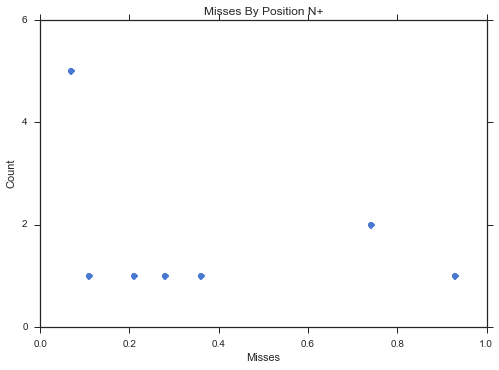

In [48]:
plt.plot(position_missed.count().index,position_missed.count(), 'o')
plt.title('Misses By Position N+')
plt.xlabel('Misses', labelpad = 4)
plt.ylabel('Count')
plt.ylim([0,6])
plt.yticks(([0,2,4,6]))

##Overall Averages

In [49]:
responded_subj = responded.groupby(level=0)
np.mean(responded_subj[['Error', 'RT']].mean())

Error    0.219113
RT       0.755519
dtype: float64

##Averages by subjected for responded trials

In [50]:
responded_subj[['Error', 'RT']].mean()

,Error,RT
Subject,,
s_03001,0.189474,0.586479
s_03003,0.042254,0.621277
s_03004,0.242424,1.027103
s_03005,0.096774,0.805840
s_03006,0.400000,0.781599
s_03007,0.343750,0.710819


## Plots by position

In [51]:
responded.Line_pct = responded.Line_pct.astype(str)
position_tasks = responded.groupby('Line_pct')
position_tasks.groups.keys()

['0.21',
 '0.09',
 '0.28',
 '0.36',
 '0.85',
 '0.33',
 '0.07',
 '0.6',
 '0.77',
 '0.65',
 '0.74',
 '0.57',
 '0.11',
 '0.45',
 '0.91',
 '0.93']

In [52]:
n_subj = len(responded_subj)

##RTs by position averages (across subjects)

In [53]:
position_tasks['RT'].mean()

Line_pct
0.07    0.725442
0.09    0.754702
0.11    0.759928
0.21    0.736905
0.28    0.695046
0.33    0.736911
0.36    0.753026
0.45    0.757110
0.57    0.795336
0.6     0.738967
0.65    0.772792
0.74    0.741862
0.77    0.700146
0.85    0.772677
0.91    0.760813
0.93    0.732112
Name: RT, dtype: float64

In [54]:
rts = position_tasks['RT'].mean()
rts_std = position_tasks['RT'].std()
rts_se = rts_std/np.sqrt(n_subj)

Next code is to calculate standard error by first computing the mean RT for each subject and then taking the std of the subjects

In [55]:
D = {}
for sub in responded_subj.groups.keys():
    for pos in position_tasks.groups.keys():
        stim = pos
        if D.get(stim,0) == 0:
            D[stim] = []
        D[stim].append(position_tasks.get_group(stim).loc[sub]['RT'].mean())

In [56]:
for stim in D:
    D[stim] = np.nanstd(D[stim])
D

{'0.07': 0.15826329278295748,
 '0.09': 0.13240802999636411,
 '0.11': 0.11914082221576081,
 '0.21': 0.11686874030926239,
 '0.28': 0.11799705668231968,
 '0.33': 0.13752821392685155,
 '0.36': 0.15272557544690346,
 '0.45': 0.1355718954800883,
 '0.57': 0.16923004640395198,
 '0.6': 0.17984906690577859,
 '0.65': 0.18292523277496039,
 '0.74': 0.20318991939108055,
 '0.77': 0.16358016057818825,
 '0.85': 0.19058097515850689,
 '0.91': 0.13858814229444413,
 '0.93': 0.16449066764834491}

In [57]:
rts_std_1 = []
for stim in D:
    rts_std_1.append(D[stim])
rts_se1 = rts_std_1/np.sqrt(n_subj)
rts_se1

array([ 0.05405535,  0.0481721 ,  0.06715303,  0.06234996,  0.08295194,
        0.05614566,  0.04771146,  0.06461072,  0.05534699,  0.06678132,
        0.07467891,  0.07780436,  0.04863904,  0.07342307,  0.05657837,
        0.06908788])

In [58]:
error = position_tasks['Error'].mean()
error_std = position_tasks['Error'].std()
error_se = error_std/np.sqrt(n_subj)

In [59]:
rts = rts.get_values()

In [60]:
error = error.get_values()

In [61]:
xvals = np.sort(D.keys())
xvals

array(['0.07', '0.09', '0.11', '0.21', '0.28', '0.33', '0.36', '0.45',
       '0.57', '0.6', '0.65', '0.74', '0.77', '0.85', '0.91', '0.93'], 
      dtype='|S4')

In [62]:
xvals = [float(x) for x in xvals]
xvals

[0.07,
 0.09,
 0.11,
 0.21,
 0.28,
 0.33,
 0.36,
 0.45,
 0.57,
 0.6,
 0.65,
 0.74,
 0.77,
 0.85,
 0.91,
 0.93]

In [63]:
pal = sns.color_palette()

([<matplotlib.axis.YTick at 0x10c5f1910>,
 <a list of 5 Text yticklabel objects>)

//anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


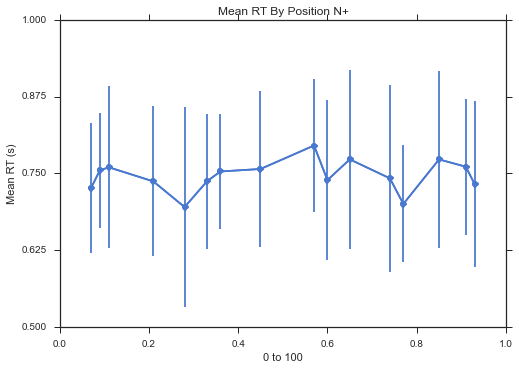

In [64]:
plt.plot(xvals, rts, 'o-', color=pal[0])
plt.errorbar(xvals, rts, yerr=rts_se1*1.96)
plt.title('Mean RT By Position N+')
plt.xlabel('0 to 100', labelpad = 4)
plt.ylabel('Mean RT (s)')
plt.ylim([0.5,1.0])
plt.yticks(([0.5, .625, .75, .875, 1]))

## Error by position

next code is doing the average for each subject first and then taking the standard deviation

In [65]:
D = {}
for sub in responded_subj.groups.keys():
    for pos in position_tasks.groups.keys():
        stim = pos
        if D.get(stim,0) == 0:
            D[stim] = []
        D[stim].append(position_tasks.get_group(stim).loc[sub]['Error'].mean())

In [66]:
for stim in D:
    #print task
    D[stim] = np.nanstd(D[stim])

In [67]:
error_std_1 = []
for stim in D:
    error_std_1.append(D[stim])
error_se_1 = error_std_1/np.sqrt(n_subj)

([<matplotlib.axis.YTick at 0x10c6c1250>,
 <a list of 7 Text yticklabel objects>)

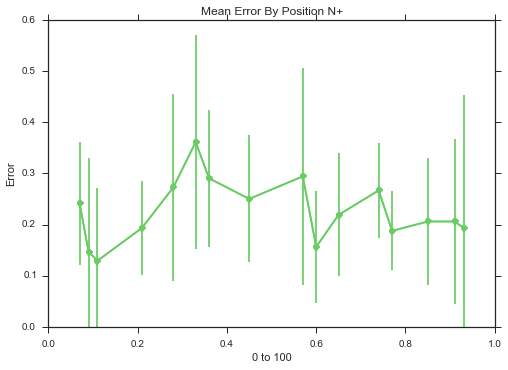

In [68]:
plt.plot(xvals, error, 'o-', color=pal[1])
plt.errorbar(xvals, error, yerr=error_se_1*1.96, color=pal[1])
plt.title('Mean Error By Position N+')
plt.xlabel('0 to 100', labelpad = 4)
plt.ylabel('Error')
plt.ylim([0,0.6])
plt.yticks(([0.0,0.1,0.2,0.3,0.4,0.5,0.6]))

In [69]:
error_se_1

array([ 0.06106901,  0.0929968 ,  0.0726129 ,  0.04709951,  0.09351393,
        0.10698352,  0.06804138,  0.06339381,  0.1083274 ,  0.05555556,
        0.06133167,  0.04709951,  0.03936547,  0.06339381,  0.08255812,
        0.13273399])

In [70]:
error

array([ 0.24137931,  0.14705882,  0.12903226,  0.19354839,  0.27272727,
        0.36111111,  0.29032258,  0.25      ,  0.29411765,  0.15625   ,
        0.21875   ,  0.26666667,  0.1875    ,  0.20588235,  0.20588235,
        0.19354839])

##Correlate PAE Vs Landmark Distance

### Distance from 0

In [71]:
dist_0 = np.array(xvals)
dist_0

array([ 0.07,  0.09,  0.11,  0.21,  0.28,  0.33,  0.36,  0.45,  0.57,
        0.6 ,  0.65,  0.74,  0.77,  0.85,  0.91,  0.93])

### Distance from 50

In [72]:
dist_50 = abs(dist_0-0.5)
dist_50

array([ 0.43,  0.41,  0.39,  0.29,  0.22,  0.17,  0.14,  0.05,  0.07,
        0.1 ,  0.15,  0.24,  0.27,  0.35,  0.41,  0.43])

### Distance from 100

In [73]:
dist_100 = abs(dist_0 - 1)
dist_100

array([ 0.93,  0.91,  0.89,  0.79,  0.72,  0.67,  0.64,  0.55,  0.43,
        0.4 ,  0.35,  0.26,  0.23,  0.15,  0.09,  0.07])

### Distance from Landmark

In [74]:
dist_Land = pd.DataFrame([dist_0, dist_50, dist_100]).min()
dist_Land

0     0.07
1     0.09
2     0.11
3     0.21
4     0.22
5     0.17
6     0.14
7     0.05
8     0.07
9     0.10
10    0.15
11    0.24
12    0.23
13    0.15
14    0.09
15    0.07
dtype: float64

## Error vs Landmark Distane (across subjects)

([<matplotlib.axis.YTick at 0x10d0a9c90>,
 <a list of 4 Text yticklabel objects>)

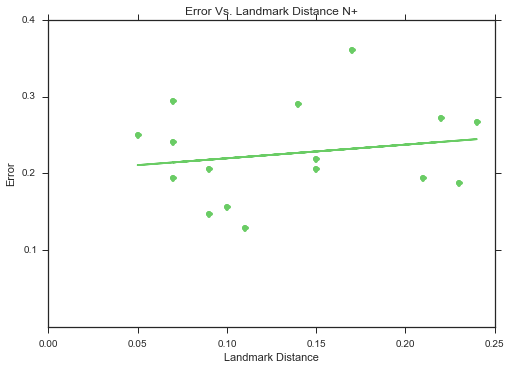

In [75]:
m1, b1 = np.polyfit(dist_Land,error,1)
plt.plot(dist_Land, error, 'o', color=pal[1])
plt.plot(dist_Land, m1*dist_Land + b1, '-', color=pal[1])
plt.title('Error Vs. Landmark Distance N+')
plt.xlabel('Landmark Distance', labelpad = 4)
plt.ylabel('Error')
plt.ylim([0,0.4])
plt.yticks(([0.1,0.2,0.3,0.4]))

## Slope

In [76]:
print m1

0.178072475414


In [77]:
from scipy.stats import linregress
slope1, intercept1, r1, p1, stderr1 = linregress(dist_Land,error)

## r

In [78]:
r1

0.18390136818750152

## r^2

In [79]:
r1*r1

0.033819713221234997

## Estimation slope vs SAT scores

In [80]:
nline_df.to_csv('nline_data.csv', sep='\t')

In [81]:
new_df = pd.read_csv('nline_data.csv',sep='\t')

In [82]:
len(new_df.catch[new_df.catch==1])

176

In [83]:
new_df['Missed'] = 0
new_df['Missed'][(new_df.RT == -1) & (new_df.Error == 1)] = 1

/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from IPython.kernel.zmq import kernelapp as app


In [84]:
new_df = new_df[new_df['catch']<1]
print len(new_df)

528


In [85]:
new_df = new_df[new_df['Missed']==0]
print len(new_df)

516


In [86]:
new_df.Missed.sum()

0

In [87]:
new_df = new_df[pd.notnull(new_df['Subject'])]
new_df

,Subject,Run,Trial,Acc,BadPress,Block,Correct,Error,ITI_onset,ITI_onset_real,...,decision_onset_real,hold,hold_onset,hold_onset_real,iti,Dist0,Dist100,Dist50,LandmarkDist,Missed
0,s_03001,run1,0,1,0,1,2,0,14.0,14.006765,...,23.008680,2.5,20.5,20.502069,6.0,0.36,0.64,0.14,0.14,0
2,s_03001,run1,2,1,0,1,2,0,33.5,33.501051,...,40.009610,3.0,37.0,37.002539,3.0,0.85,0.15,0.35,0.15,0
3,s_03001,run1,3,1,0,1,1,0,41.5,41.501076,...,50.009948,4.0,46.0,46.001543,4.0,0.45,0.55,0.05,0.05,0
4,s_03001,run1,4,1,0,1,1,0,51.5,51.500943,...,60.510471,4.5,56.0,56.001799,4.0,0.93,0.07,0.43,0.07,0
5,s_03001,run1,5,1,0,1,2,0,62.0,62.000718,...,73.011000,5.0,68.0,68.001537,5.5,0.33,0.67,0.17,0.17,0
6,s_03001,run1,6,0,0,1,2,1,74.5,74.500277,...,84.511487,6.0,78.5,78.501440,3.5,0.74,0.26,0.24,0.24,0
7,s_03001,run1,7,1,0,1,1,0,86.0,86.000385,...,96.511977,3.5,93.0,93.001410,6.5,0.77,0.23,0.27,0.23,0
8,s_03001,run1,8,1,0,1,1,0,98.0,98.000558,...,108.512305,5.5,103.0,103.001983,4.5,0.09,0.91,0.41,0.09,0
10,s_03001,run1,10,1,0,1,2,0,123.0,123.001064,...,129.513379,2.5,127.0,127.001189,3.5,0.07,0.93,0.43,0.07,0
12,s_03001,run1,12,1,0,1,2,0,140.0,140.000215,...,152.014295,6.5,145.5,145.502030,5.0,0.60,0.40,0.10,0.10,0


In [88]:
group_task = new_df.groupby(['Subject','Line_pct'])

In [89]:
error = group_task['Error'].mean()
response = group_task['Response'].mean()

In [90]:
error

Subject  Line_pct
s_03001  0.07        0.166667
         0.09        0.000000
         0.11        0.200000
         0.21        0.333333
         0.28        0.333333
         0.33        0.500000
         0.36        0.166667
         0.45        0.000000
         0.57        0.000000
         0.60        0.000000
         0.65        0.333333
         0.74        0.333333
         0.77        0.166667
         0.85        0.333333
         0.91        0.000000
         0.93        0.166667
s_03003  0.07        0.000000
         0.09        0.000000
         0.11        0.000000
         0.21        0.000000
         0.28        0.000000
         0.33        0.000000
         0.36        0.250000
         0.45        0.000000
         0.57        0.000000
         0.60        0.000000
         0.65        0.250000
         0.74        0.000000
         0.77        0.000000
         0.85        0.166667
                       ...   
s_03006  0.11        0.166667
         0.21        0

In [91]:
subjs = new_df['Subject'].unique()

In [92]:
error_dict = {}
position_dict = {}
results_list = []
for s in subjs:
    d_tmp = {}
    error_dict[s] = error.loc[s]
    slope,inter,r,p,stderr = linregress(error_dict[s].index, error_dict[s])
    d_tmp = {'Subject':s, 'slope_E':slope, 'int_E':inter,
             'r_E':r,'p_E':p, 'stderr_E':stderr,
             'R2_E':r*r}
    results_list.append(d_tmp)
res_df = pd.DataFrame(results_list)

In [93]:
res_df

,R2_E,Subject,int_E,p_E,r_E,slope_E,stderr_E
0,0.004822,s_03001,0.207984,0.798306,-0.069441,-0.037173,0.142726
1,0.024736,s_03003,0.017814,0.560756,0.157278,0.048188,0.080866
2,0.166708,s_03004,0.360300,0.116403,-0.408298,-0.254393,0.152007
3,0.190476,s_03005,-0.028205,0.091007,0.436435,0.256896,0.141543
4,0.003987,s_03006,0.420608,0.816285,-0.063146,-0.037424,0.158077
5,0.003859,s_03007,0.362027,0.819232,-0.062117,-0.036923,0.158556


In [94]:
res_grp = res_df.groupby('Subject')

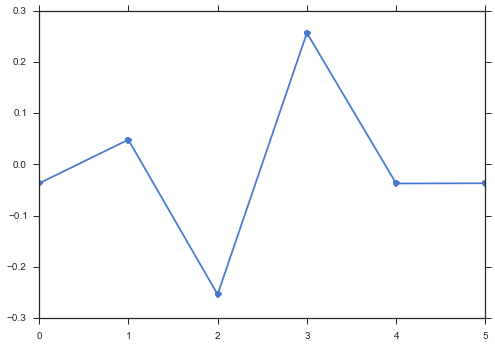

In [95]:
plt.plot(res_df['slope_E'], '-o')